In [1]:
import sys
sys.path.append('../../')
from processingNetwork.ProcessingNetwork import ProcessingNetwork
from processingNetwork.ProcessingNode import ProcessingNode


# Data Processing Example
## 1 First we will generate some data we want to process

In [2]:
import numpy as np
data = np.random.rand(150,1)
#data

## 2. We create some processing steps for the 5 point moving average of the data points.

In [3]:
class MovingAverage(ProcessingNode):
    
    def do_input(self,feature,context):
        point =  feature['point']
        if not 'past_number' in context:
            context['past_number'] = point
        context['past_number'] = 0.9*context['past_number'] + point*0.1
        return context['past_number']
    


In [4]:
class PointBuffer(ProcessingNode):

    def do_input(self,feature,context):
        # Do some work
        #print(context['points'])
        #context['points'] = context['points'] + 1
        return {'data':feature['point'],'test':1}
        


## 3. Create a two node network

In [5]:
p_def = {}

p_def['PointBuffer']= {'name':'PointBuffer', 
             'type': PointBuffer,
             'settings':{'points':10, 'input':'number'}, ######## NOTE: Setting points to 10
             'dependencies':{'input':{'point':['__ref','point_in']}}}

p_def['MovingAverage']= {'name':'MovingAverage', 
             'type': MovingAverage,
             'settings':{},
             'dependencies':{'input':{'point':['__ref','PointBuffer','data']}}}

pn = ProcessingNetwork(p_def)


## 4. Process the points

In [6]:
features = []
for p in data:
    feature = {'point_in' : p[0]}
    feature = pn.process(feature)
    features.append(feature)
print(len(features))

150


In [7]:
features

[{'point_in': 0.8164750106933664,
  'PointBuffer': {'data': 0.8164750106933664, 'test': 1},
  'MovingAverage': 0.8164750106933664},
 {'point_in': 0.39382975154247435,
  'PointBuffer': {'data': 0.39382975154247435, 'test': 1},
  'MovingAverage': 0.7742104847782771},
 {'point_in': 0.8429322496777752,
  'PointBuffer': {'data': 0.8429322496777752, 'test': 1},
  'MovingAverage': 0.7810826612682269},
 {'point_in': 0.9332833020590582,
  'PointBuffer': {'data': 0.9332833020590582, 'test': 1},
  'MovingAverage': 0.7963027253473101},
 {'point_in': 0.26644075546293267,
  'PointBuffer': {'data': 0.26644075546293267, 'test': 1},
  'MovingAverage': 0.7433165283588723},
 {'point_in': 0.9243658653034552,
  'PointBuffer': {'data': 0.9243658653034552, 'test': 1},
  'MovingAverage': 0.7614214620533306},
 {'point_in': 0.48667403431103917,
  'PointBuffer': {'data': 0.48667403431103917, 'test': 1},
  'MovingAverage': 0.7339467192791015},
 {'point_in': 0.2031908815315201,
  'PointBuffer': {'data': 0.20319088

## 5. Visualize

In [8]:
import pandas as pd
df = pd.DataFrame(features)
display(df)

,point_in,PointBuffer,MovingAverage
0,0.816475,"{'data': 0.8164750106933664, 'test': 1}",0.816475
1,0.393830,"{'data': 0.39382975154247435, 'test': 1}",0.774210
2,0.842932,"{'data': 0.8429322496777752, 'test': 1}",0.781083
3,0.933283,"{'data': 0.9332833020590582, 'test': 1}",0.796303
4,0.266441,"{'data': 0.26644075546293267, 'test': 1}",0.743317
...,...,...,...
145,0.087432,"{'data': 0.08743197002966518, 'test': 1}",0.442669
146,0.421608,"{'data': 0.4216080522584177, 'test': 1}",0.440563
147,0.048213,"{'data': 0.048213413120527626, 'test': 1}",0.401328
148,0.222293,"{'data': 0.22229271207616164, 'test': 1}",0.383424


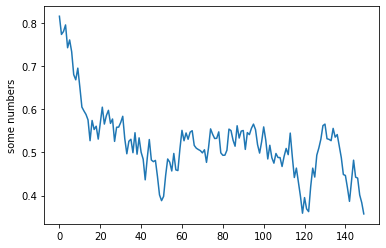

In [9]:
import matplotlib.pyplot as plt
plt.plot(df['MovingAverage'])
#plt.plot(df['PointBuffer'])

plt.ylabel('some numbers')
plt.show()

# 6. Reconfigure as needed:

/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


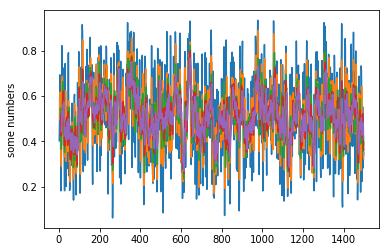

In [94]:
p_def = {}

for i in range(5,30,5):

    si = str(i)
    p_def['PointBuffer'+ str(i)]= {'name':'PointBuffer'+ str(i), 
                 'type': PointBuffer,
                 'settings':{'points':i, 'input':'number'}, ######## NOTE: Setting points to 10
                 'dependencies':[]}


    p_def['MovingAverage'+ str(i)]= {'name':'MovingAverage'+ str(i), 
                 'type': MovingAverage,
                 'settings':{},
                 'dependencies':['PointBuffer'+ str(i)]}


pn = ProcessingNetwork(p_def)

features = []
for p in data:
    feature = {'number' : p[0]}
    feature = pn.process(feature)
    features.append(feature)

df = pd.DataFrame(features)

for i in  range(5,30,5):
    plt.plot(df['MovingAverage'+ str(i)])

plt.ylabel('some numbers')
plt.show()